### Importing necessary packages

In [4]:
import os
import numpy as np 
import pandas as pd

import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

import matplotlib.pyplot as plt

In [6]:
base_dir = os.path.join("drive/MyDrive/Rock-Paper-Scissors")
print("Base directory --> ", os.listdir(base_dir))

Base directory -->  ['train', 'test', 'validation']


### Defining dataset path

In [7]:
# Train set
train_dir = os.path.join("drive/MyDrive/Rock-Paper-Scissors/train/")
print("Train --> ", os.listdir(train_dir))

# Test set
test_dir = os.path.join("drive/MyDrive/Rock-Paper-Scissors/test/")
print("Test --> ", os.listdir(test_dir))

# Validation set
validation_dir = os.path.join("drive/MyDrive/Rock-Paper-Scissors/validation/")
print("Validation --> ", os.listdir(validation_dir)[:5])

Train -->  ['scissors', 'paper', 'rock']
Test -->  ['paper', 'rock', 'scissors']
Validation -->  ['paper-hires1.png', 'scissors7.png', 'paper6.png', 'paper1.png', 'scissors-hires2.png']


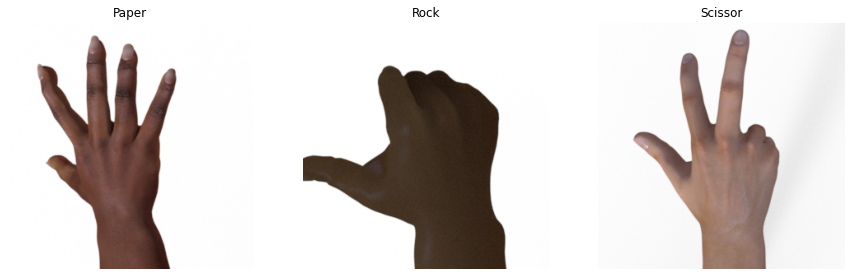

In [8]:
# Displaying random image from the dataset

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

sample_paper = random.choice(os.listdir(train_dir + "paper"))
image = load_img(train_dir + "paper/" + sample_paper)
ax[0].imshow(image)
ax[0].set_title("Paper")
ax[0].axis("Off")

sample_rock = random.choice(os.listdir(train_dir + "rock"))
image = load_img(train_dir + "rock/" + sample_rock)
ax[1].imshow(image)
ax[1].set_title("Rock")
ax[1].axis("Off")

sample_scissor = random.choice(os.listdir(train_dir + "scissors"))
image = load_img(train_dir + "scissors/" + sample_scissor)
ax[2].imshow(image)
ax[2].set_title("Scissor")
ax[2].axis("Off")

plt.show()

### Defining the CNN Model

In [9]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

### Callback Function

In [32]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached >99% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()

### Training Generator with Image Augmentation

In [33]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2, # Shifting image width by 20%
      height_shift_range=0.2,# Shifting image height by 20%
      shear_range=0.2,       # Rotation across X-axis by 20%
      zoom_range=0.2,        # Image zooming by 20%
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 2520 images belonging to 3 classes.


### Validation Generator

In [34]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    class_mode = 'categorical',
    batch_size = 20
)

Found 372 images belonging to 3 classes.


### Model Fitting

In [35]:
history = model.fit(
      train_generator,
      steps_per_epoch = np.ceil(2520/20),  # 2520 images = batch_size * steps
      epochs = 10,
      validation_data=validation_generator,
      validation_steps = np.ceil(372/20),  # 372 images = batch_size * steps
      callbacks=[callbacks],
      verbose = 2)

Epoch 1/10
126/126 - 22s - loss: 0.1046 - accuracy: 0.9639 - val_loss: 0.0234 - val_accuracy: 0.9866
Epoch 2/10
126/126 - 21s - loss: 0.0933 - accuracy: 0.9683 - val_loss: 0.2103 - val_accuracy: 0.9140
Epoch 3/10
126/126 - 21s - loss: 0.0742 - accuracy: 0.9750 - val_loss: 0.0448 - val_accuracy: 0.9785
Epoch 4/10
126/126 - 21s - loss: 0.0583 - accuracy: 0.9841 - val_loss: 0.0917 - val_accuracy: 0.9704
Epoch 5/10
126/126 - 21s - loss: 0.0613 - accuracy: 0.9810 - val_loss: 0.1028 - val_accuracy: 0.9704
Epoch 6/10
126/126 - 21s - loss: 0.0393 - accuracy: 0.9865 - val_loss: 0.1056 - val_accuracy: 0.9651
Epoch 7/10
126/126 - 21s - loss: 0.0509 - accuracy: 0.9865 - val_loss: 0.2316 - val_accuracy: 0.9274
Epoch 8/10
126/126 - 22s - loss: 0.0468 - accuracy: 0.9821 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 9/10
126/126 - 21s - loss: 0.0582 - accuracy: 0.9802 - val_loss: 0.0583 - val_accuracy: 0.9731
Epoch 10/10
126/126 - 21s - loss: 0.0663 - accuracy: 0.9758 - val_loss: 0.0372 - val_accura

### Visualizing the training

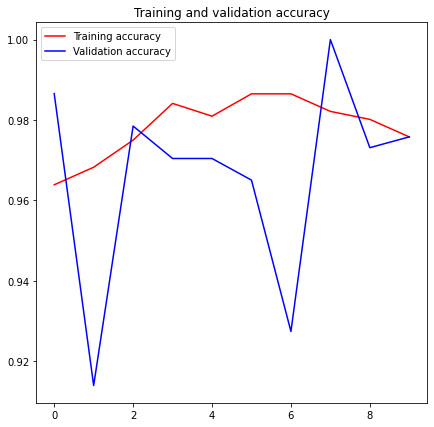

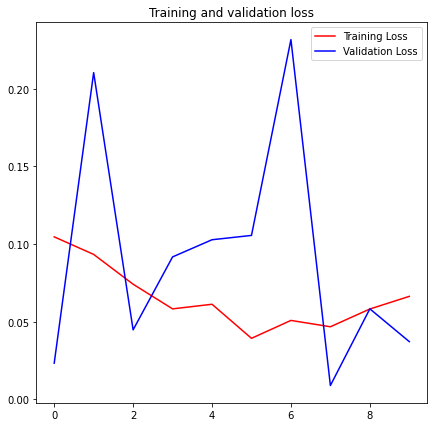

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Preparing the Test Data

In [37]:
test_img = os.listdir(os.path.join(validation_dir))

test_df = pd.DataFrame({'Image': test_img})
test_df.head()

,Image
0,paper-hires1.png
1,scissors7.png
2,paper6.png
3,paper1.png
4,scissors-hires2.png


### Test Generator

In [38]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    validation_dir, 
    x_col = 'Image',
    y_col = None,
    class_mode = None,
    target_size = (150, 150),
    batch_size = 20,
    shuffle = False
)

Found 33 validated image filenames.


In [39]:
predict = model.predict_generator(test_generator, steps = int(np.ceil(33/20)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [40]:
# Identifying the classes

label_map = dict((v,k) for k,v in train_generator.class_indices.items())
label_map

{0: 'paper', 1: 'rock', 2: 'scissors'}

In [41]:
test_df['Label'] = np.argmax(predict, axis = -1) # axis = -1 --> To compute the max element index within list of lists

test_df['Label'] = test_df['Label'].replace(label_map)

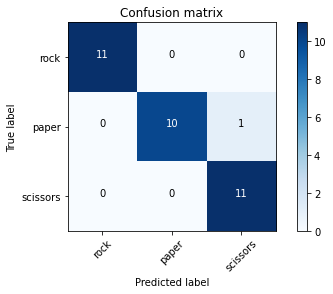

In [56]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Y_true = [2 ,3 ,2 ,2 ,3 ,1 ,3 ,1 ,2 ,1 ,1 ,1 ,1 ,3 ,1 ,3 ,2 ,2 ,1 ,2 ,3 ,3 ,2 ,3 ,1 ,3 ,1 ,1 ,3 ,2 ,2 ,3 ,2]
Y_pred_classes = [2 ,3 ,2 ,2 ,3 ,1 ,3 ,1 ,2 ,1 ,1 ,1 ,1 ,3 ,1 ,3 ,2 ,2 ,1 ,2 ,3 ,3 ,2 ,3 ,1 ,3 ,1 ,1 ,3 ,2 ,3 ,3 ,2]
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = ['rock','paper','scissors'])

In [51]:
test_df

,Image,Label
0,paper-hires1.png,paper
1,scissors7.png,scissors
2,paper6.png,paper
3,paper1.png,paper
4,scissors-hires2.png,scissors
5,rock8.png,rock
6,scissors2.png,scissors
7,rock7.png,rock
8,paper8.png,paper
9,rock9.png,rock


In [43]:
test_df.Label.value_counts()

scissors    12
rock        11
paper       10
Name: Label, dtype: int64

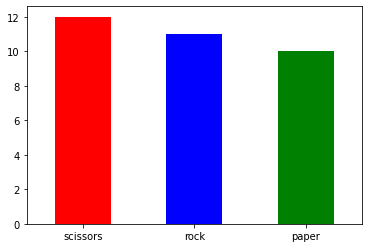

In [44]:
test_df.Label.value_counts().plot.bar(color = ['red','blue','green'])
plt.xticks(rotation = 0)
plt.show()

### Results of testing the model with unseen images

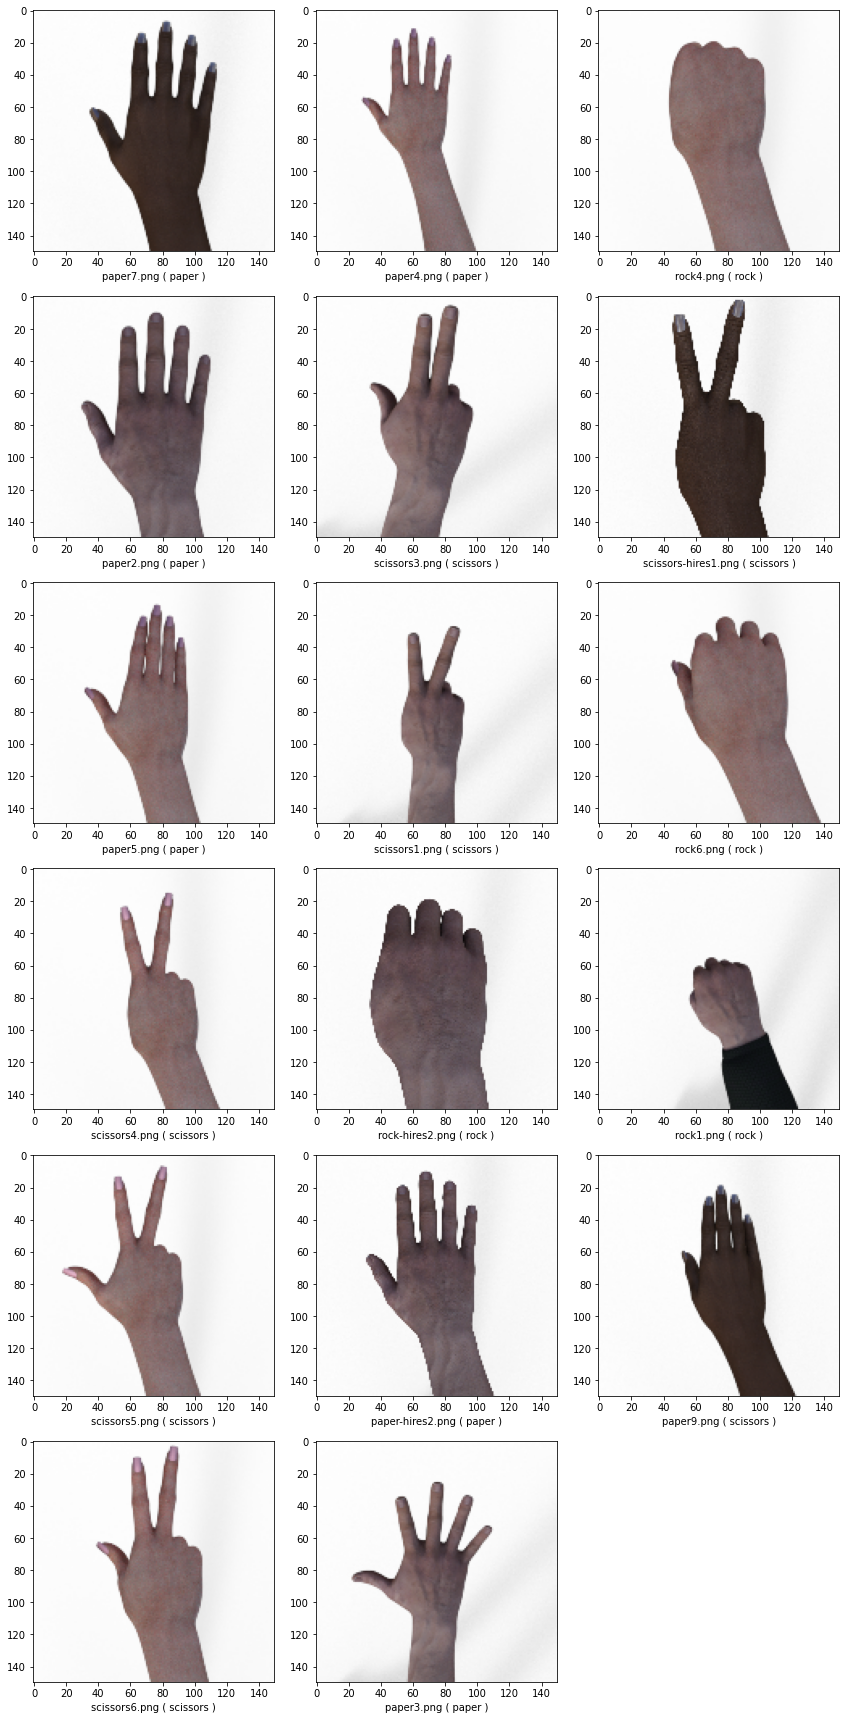

In [50]:
v = random.randint(0, 30)

sample_test = test_df.iloc[v:(v+18)].reset_index(drop = True)
sample_test.head()

plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['Image']
    category = row['Label']
    img = load_img(validation_dir + filename, target_size = (150, 150))
    plt.subplot(6, 3, index + 1)
    plt.imshow(img)
    plt.xlabel(filename + ' ( ' + "{}".format(category) + ' )' )
plt.tight_layout()
plt.show()

In [46]:
lis = []
for ind in test_df.index: 
    if(test_df['Label'][ind] in test_df['Image'][ind]):
        lis.append(1)
    else:
        lis.append(0)

In [47]:
print("Accuracy of the model on test data is {:.2f}".format((sum(lis)/len(lis))*100))

Accuracy of the model on test data is 96.97
